In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np



In [2]:
dataset=pd.read_csv("loan_approval_dataset.csv")

In [3]:
dataset

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,4266,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,4267,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,4268,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved


In [4]:
rows, columns = dataset.shape
rows, columns

(4269, 13)

# 1.Replace Nan values

In [5]:

dataset.isnull().sum()

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

In [6]:
column_data_types = dataset.dtypes

In [7]:
column_data_types

loan_id                       int64
 no_of_dependents             int64
 education                   object
 self_employed               object
 income_annum                 int64
 loan_amount                  int64
 loan_term                    int64
 cibil_score                  int64
 residential_assets_value     int64
 commercial_assets_value      int64
 luxury_assets_value          int64
 bank_asset_value             int64
 loan_status                 object
dtype: object

In [8]:
dataset.columns

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

In [9]:
unique_values = dataset.apply(pd.unique)

print(unique_values)

loan_id                      [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...
 no_of_dependents                                           [2, 0, 3, 5, 4, 1]
 education                                          [ Graduate,  Not Graduate]
 self_employed                                                     [ No,  Yes]
 income_annum                [9600000, 4100000, 9100000, 8200000, 9800000, ...
 loan_amount                 [29900000, 12200000, 29700000, 30700000, 24200...
 loan_term                                [12, 8, 20, 10, 4, 2, 18, 16, 14, 6]
 cibil_score                 [778, 417, 506, 467, 382, 319, 678, 782, 388, ...
 residential_assets_value    [2400000, 2700000, 7100000, 18200000, 12400000...
 commercial_assets_value     [17600000, 2200000, 4500000, 3300000, 8200000,...
 luxury_assets_value         [22700000, 8800000, 33300000, 23300000, 294000...
 bank_asset_value            [8000000, 3300000, 12800000, 7900000, 5000000,...
 loan_status                                        

In [10]:
dataset[' loan_status'].astype(str)

0        Approved
1        Rejected
2        Rejected
3        Rejected
4        Rejected
          ...    
4264     Rejected
4265     Approved
4266     Rejected
4267     Approved
4268     Approved
Name:  loan_status, Length: 4269, dtype: object

# 2.How many loans are approved from overall data

In [11]:
# Convert 'loan_status' column to string
dataset[' loan_status'] = dataset[' loan_status'].astype(str)

# Count the occurrences of 'Approved' after removing leading/trailing whitespace
approved_count = (dataset[' loan_status'].str.strip() == 'Approved').sum()

# Display the result
print(approved_count)

2656


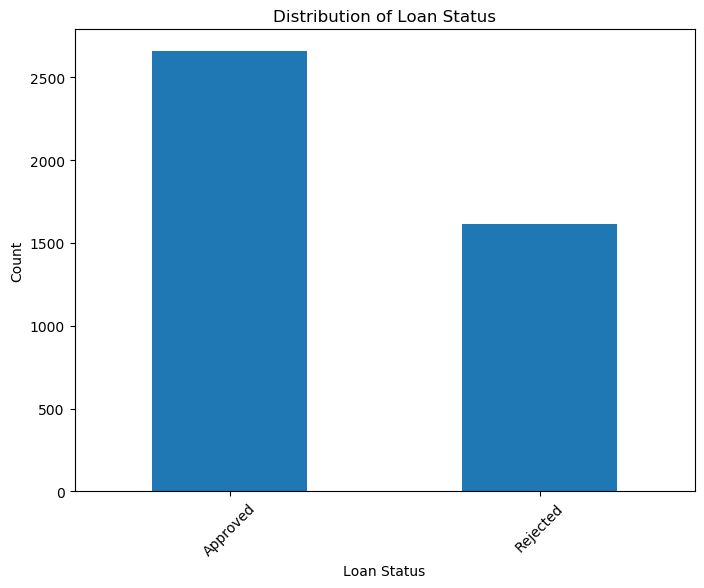

In [12]:
#To visualize the distribution of the 'loan_status' column using a histogram, you can use a data visualization library like Matplotlib or Seaborn. Here's an example using Matplotlib:
import matplotlib.pyplot as plt

# Convert 'loan_status' column to string
dataset[' loan_status'] = dataset[' loan_status'].astype(str)

# Remove leading/trailing whitespace
dataset[' loan_status'] = dataset[' loan_status'].str.strip()

# Create a histogram
plt.figure(figsize=(8, 6))
dataset[' loan_status'].value_counts().plot(kind='bar')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.title('Distribution of Loan Status')
plt.xticks(rotation=45)
plt.show()

# 3.What is the overall loan approval rate in the dataset?

In [13]:
dataset[' loan_status'].value_counts(normalize=True)

Approved    0.62216
Rejected    0.37784
Name:  loan_status, dtype: float64

# 4.What is the distribution of loan amounts requested?

In [37]:
# Loan Amount Distribution
dataset[' loan_amount'].describe()

count    4.269000e+03
mean     1.513345e+07
std      9.043363e+06
min      3.000000e+05
25%      7.700000e+06
50%      1.450000e+07
75%      2.150000e+07
max      3.950000e+07
Name:  loan_amount, dtype: float64

# 5.What is the distribution of loan terms requested?

In [38]:
# Loan Term Distribution
print("\nLoan Term Distribution:")
dataset[' loan_term'].value_counts()


Loan Term Distribution:


6     490
12    456
4     447
10    436
18    422
16    412
20    411
14    405
2     404
8     386
Name:  loan_term, dtype: int64

# 6..What is the distribution of CIBIL (credit) scores in the dataset?

In [39]:
# Credit Score Distribution
print("\nCredit Score Distribution:")
dataset[' cibil_score'].describe()


Credit Score Distribution:


count    4269.000000
mean      599.936051
std       172.430401
min       300.000000
25%       453.000000
50%       600.000000
75%       748.000000
max       900.000000
Name:  cibil_score, dtype: float64

# 7.What is the distribution of different asset values (residential, commercial, luxury, and bank assets)?

In [40]:
# Asset Value Distribution
print("\nAsset Value Distribution:")
for asset in [' residential_assets_value', ' commercial_assets_value', ' luxury_assets_value', ' bank_asset_value']:
    print(f"{asset}:")
    print(dataset[asset].describe())


Asset Value Distribution:
 residential_assets_value:
count    4.269000e+03
mean     7.472617e+06
std      6.503637e+06
min     -1.000000e+05
25%      2.200000e+06
50%      5.600000e+06
75%      1.130000e+07
max      2.910000e+07
Name:  residential_assets_value, dtype: float64
 commercial_assets_value:
count    4.269000e+03
mean     4.973155e+06
std      4.388966e+06
min      0.000000e+00
25%      1.300000e+06
50%      3.700000e+06
75%      7.600000e+06
max      1.940000e+07
Name:  commercial_assets_value, dtype: float64
 luxury_assets_value:
count    4.269000e+03
mean     1.512631e+07
std      9.103754e+06
min      3.000000e+05
25%      7.500000e+06
50%      1.460000e+07
75%      2.170000e+07
max      3.920000e+07
Name:  luxury_assets_value, dtype: float64
 bank_asset_value:
count    4.269000e+03
mean     4.976692e+06
std      3.250185e+06
min      0.000000e+00
25%      2.300000e+06
50%      4.600000e+06
75%      7.100000e+06
max      1.470000e+07
Name:  bank_asset_value, dtype: float

# 8.How does the number of dependents impact loan approval/rejection?

In [43]:
# Dependents Analysis
print("\nDependents Analysis:")
print(dataset.groupby(' no_of_dependents')[' loan_status'].value_counts(normalize=True))


Dependents Analysis:
 no_of_dependents   loan_status
0                  Approved        0.641854
                   Rejected        0.358146
1                  Approved        0.616930
                   Rejected        0.383070
2                  Approved        0.622881
                   Rejected        0.377119
3                  Approved        0.628611
                   Rejected        0.371389
4                  Approved        0.618351
                   Rejected        0.381649
5                  Approved        0.603269
                   Rejected        0.396731
Name:  loan_status, dtype: float64


# 9.How does the education level (Graduate or Not Graduate) influence loan approval/rejection?

In [44]:
# Education Level Analysis
print("\nEducation Level Analysis:")
dataset.groupby(' education')[' loan_status'].value_counts(normalize=True)


Education Level Analysis:


 education     loan_status
Graduate      Approved        0.624534
              Rejected        0.375466
Not Graduate  Approved        0.619765
              Rejected        0.380235
Name:  loan_status, dtype: float64

# 10.How does the self-employment status (Yes or No) affect loan approval/rejection?

In [45]:
# Self-Employment Status Analysis
print("\nSelf-Employment Status Analysis:")
dataset.groupby(' self_employed')[' loan_status'].value_counts(normalize=True)


Self-Employment Status Analysis:


 self_employed   loan_status
No              Approved        0.621992
                Rejected        0.378008
Yes             Approved        0.622326
                Rejected        0.377674
Name:  loan_status, dtype: float64

# 11.What is the distribution of annual income in the dataset?

In [46]:
# Income Analysis
print("\nIncome Analysis:")
print(dataset[' income_annum'].describe())


Income Analysis:
count    4.269000e+03
mean     5.059124e+06
std      2.806840e+06
min      2.000000e+05
25%      2.700000e+06
50%      5.100000e+06
75%      7.500000e+06
max      9.900000e+06
Name:  income_annum, dtype: float64


In [ ]:
# Dependents Analysis
print("\nDependents Analysis:")
print(data.groupby(' no_of_dependents')[' loan_status'].value_counts(normalize=True))

# 12 .How many people were slef employed and NOt selfemployed

In [14]:
# Convert 'loan_status' column to string
dataset[' self_employed'] = dataset[' self_employed'].astype(str)

# Count the occurrences of 'Approved' after removing leading/trailing whitespace
selfemployed_count = (dataset[' self_employed'].str.strip() == 'Yes').sum()
Nonselfemployed_count = (dataset[' self_employed'].str.strip() == 'No').sum()


In [15]:
Nonselfemployed_count

2119

In [16]:
selfemployed_count

2150

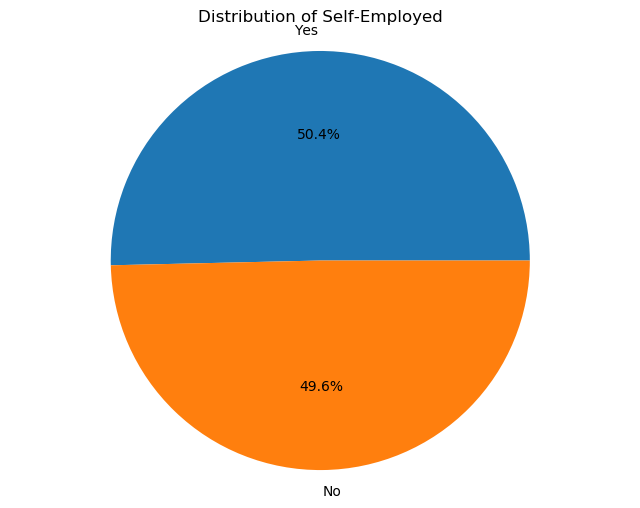

In [17]:

# Convert 'loan_status' column to string
dataset[' self_employed'] = dataset[' self_employed'].astype(str)

# Remove leading/trailing whitespace
dataset[' self_employed'] = dataset[' self_employed'].str.strip()

values = dataset[' self_employed'].value_counts().values
labels = dataset[' self_employed'].value_counts().index

plt.figure(figsize=(8, 6))
plt.pie(values, labels=labels, autopct='%1.1f%%')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is drawn as a circle.
plt.title('Distribution of Self-Employed')
plt.show()

# 13.What is the distribution of CIBIL scores across approved and rejected loans?

C:\anaconda\envs\aiml\lib\site-packages\ipykernel_launcher.py:17: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  app.launch_new_instance()
C:\anaconda\envs\aiml\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.



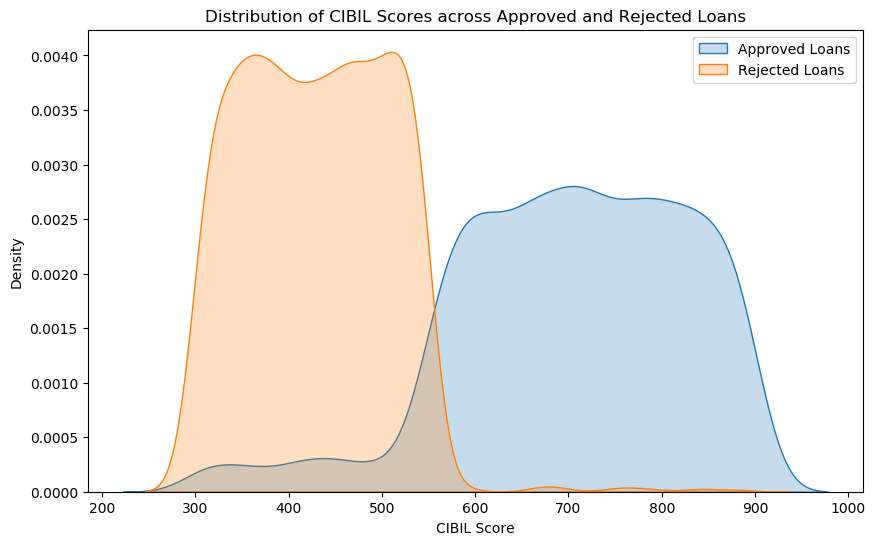

In [18]:
import seaborn as sns

# Assuming 'dataset' is your pandas DataFrame
# and 'loan_status' and 'cibil_score' columns exist

# Convert 'loan_status' column to string
dataset[' loan_status'] = dataset[' loan_status'].astype(str)

# Remove leading/trailing whitespace
dataset[' loan_status'] = dataset[' loan_status'].str.strip()

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the KDE plot for approved loans
approved_loans = dataset[dataset[' loan_status'] == 'Approved'][' cibil_score']
sns.kdeplot(approved_loans, shade=True, label='Approved Loans', ax=ax)

# Plot the KDE plot for rejected loans
rejected_loans = dataset[dataset[' loan_status'] != 'Approved'][' cibil_score']
sns.kdeplot(rejected_loans, shade=True, label='Rejected Loans', ax=ax)

# Set plot title and labels
ax.set_title('Distribution of CIBIL Scores across Approved and Rejected Loans')
ax.set_xlabel('CIBIL Score')
ax.set_ylabel('Density')

# Add legend
ax.legend()

# Show the plot
plt.show()

# 13.How does the income_annum distribution differ between graduates and non-graduates?

In [19]:
# Convert 'loan_status' column to string
dataset[' education'] = dataset[' education'].astype(str)

# Count the occurrences of 'Approved' after removing leading/trailing whitespace
Graduate= (dataset[' education'].str.strip() == 'Graduate').sum()
Not_Graduate = (dataset[' education'].str.strip() == 'Not Graduate').sum()

In [20]:
Graduate

2144

In [21]:
Not_Graduate

2125

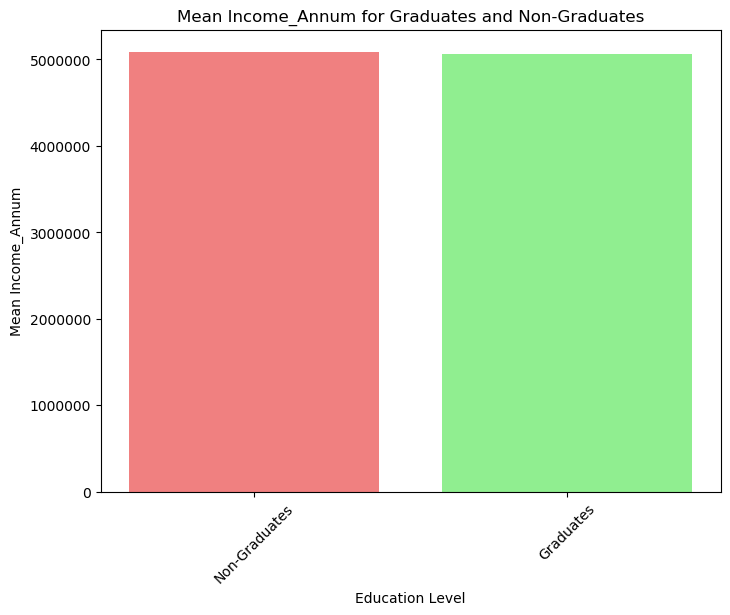

In [22]:

# Convert 'education' column to string
dataset[' education'] = dataset[' education'].astype(str)

# Remove leading/trailing whitespace
dataset[' education'] = dataset[' education'].str.strip()

# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# Split the data into graduates and non-graduates
graduates = dataset[dataset[' education'].str.contains('Graduate')]
non_graduates = dataset[~dataset[' education'].str.contains('Not Graduate')]

# Calculate mean income_annum for each group
mean_income_graduates = graduates[' income_annum'].mean()
mean_income_non_graduates = non_graduates[' income_annum'].mean()

# Create a bar plot
bar_data = [mean_income_non_graduates, mean_income_graduates]
bar_labels = ['Non-Graduates', 'Graduates']
bar_colors = ['lightcoral', 'lightgreen']

ax.bar(bar_labels, bar_data, color=bar_colors)

# Set plot title and labels
ax.set_title('Mean Income_Annum for Graduates and Non-Graduates')
ax.set_xlabel('Education Level')
ax.set_ylabel('Mean Income_Annum')

# Rotate x-axis labels
plt.xticks(rotation=45)

# Show the plot
plt.show()

# 14.Is there a correlation between loan_amount and income_annum?

In [23]:
# Convert 'loan_status' column to string
dataset[' education'] = dataset[' education'].astype(str)

# Count the occurrences of 'Approved' after removing leading/trailing whitespace
Graduate= (dataset[' education'].str.strip() == 'Graduate').sum()
Not_Graduate = (dataset[' education'].str.strip() == 'Not Graduate').sum()
mean_income_graduates = graduates[' income_annum'].mean()
mean_income_non_graduates = non_graduates[' income_annum'].mean()

In [24]:
mean_income_graduates 

5059123.9166081045

In [25]:
mean_income_non_graduates 

5091604.47761194

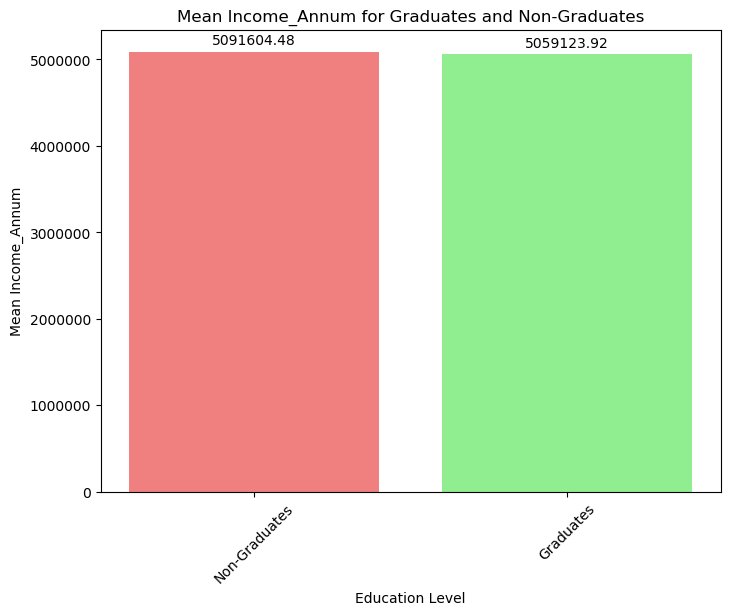

In [26]:
dataset[' education'] = dataset[' education'].astype(str)

# Remove leading/trailing whitespace
dataset[' education'] = dataset[' education'].str.strip()

# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# Split the data into graduates and non-graduates
graduates = dataset[dataset[' education'].str.contains('Graduate')]
non_graduates = dataset[~dataset[' education'].str.contains('Not Graduate')]

# Calculate mean income_annum for each group
mean_income_graduates = graduates[' income_annum'].mean()
mean_income_non_graduates = non_graduates[' income_annum'].mean()

# Create a bar plot
bar_data = [mean_income_non_graduates, mean_income_graduates]
bar_labels = ['Non-Graduates', 'Graduates']
bar_colors = ['lightcoral', 'lightgreen']

# Plot the bars
bar_positions = range(len(bar_data))
bar_heights = ax.bar(bar_positions, bar_data, color=bar_colors)

# Add labels to the bars
for bar, label in zip(bar_heights, bar_data):
    height = bar.get_height()
    ax.annotate(f'{label:.2f}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom')

# Set x-axis tick labels
ax.set_xticks(bar_positions)
ax.set_xticklabels(bar_labels)

# Set plot title and labels
ax.set_title('Mean Income_Annum for Graduates and Non-Graduates')
ax.set_xlabel('Education Level')
ax.set_ylabel('Mean Income_Annum')

# Rotate x-axis labels
plt.xticks(rotation=45)

# Show the plot
plt.show()

# 15.Is there a correlation between loan_amount and income_annum?

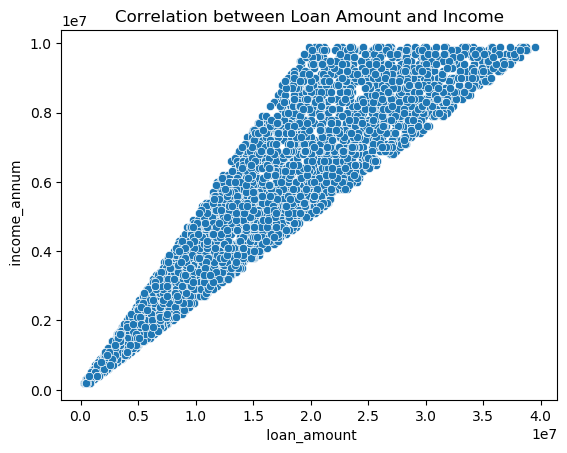

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'loan_amount' and 'income_annum' columns exist in the dataset
sns.scatterplot(x=' loan_amount', y=' income_annum', data=dataset)
plt.title('Correlation between Loan Amount and Income')
plt.show()

In [28]:
# Calculate the correlation coefficient
loan_amount_income_corr = dataset[' loan_amount'].corr(dataset[' income_annum'])
loan_amount_income_corr

0.9274699109871487

# 16.Compare the average loan_term between approved and rejected loans

In [29]:
dataset['loan_status_numeric'] = dataset[' loan_status'].map({'Approved': 1, 'Rejected': 0})

# Group the data by 'loan_status' and calculate the mean 'loan_term'
avg_loan_term = dataset.groupby('loan_status_numeric')[' loan_term'].mean()

# Print the results
print("Average Loan Term for Approved Loans:", avg_loan_term[1])
print("Average Loan Term for Rejected Loans:", avg_loan_term[0])

Average Loan Term for Approved Loans: 10.397590361445783
Average Loan Term for Rejected Loans: 11.728456292622443


# 17.What is the average value of loan_amount?


In [30]:
dataset[' loan_amount'].mean()

15133450.456781447

# 18.What is the most frequently repeated value of loan_amount?

In [31]:
dataset[' loan_amount'].mode()[0]

10600000

# 19.what kind of relationship between cibil_score and loan_amount

In [32]:
dataset.corr()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status_numeric
loan_id,1.000000,0.005326,0.012592,0.008170,0.009809,0.016323,0.020936,0.018595,-0.000862,0.010765,0.017685
no_of_dependents,0.005326,1.000000,0.007266,-0.003366,-0.020111,-0.009998,0.007376,-0.001531,0.002817,0.011163,-0.018114
income_annum,0.012592,0.007266,1.000000,0.927470,0.011488,-0.023034,0.636841,0.640328,0.929145,0.851093,-0.015189
loan_amount,0.008170,-0.003366,0.927470,1.000000,0.008437,-0.017035,0.594596,0.603188,0.860914,0.788122,0.016150
loan_term,0.009809,-0.020111,0.011488,0.008437,1.000000,0.007810,0.008016,-0.005478,0.012490,0.017177,-0.113036
cibil_score,0.016323,-0.009998,-0.023034,-0.017035,0.007810,1.000000,-0.019947,-0.003769,-0.028618,-0.015478,0.770518
residential_assets_value,0.020936,0.007376,0.636841,0.594596,0.008016,-0.019947,1.000000,0.414786,0.590932,0.527418,-0.014367
commercial_assets_value,0.018595,-0.001531,0.640328,0.603188,-0.005478,-0.003769,0.414786,1.000000,0.591128,0.548576,0.008246
luxury_assets_value,-0.000862,0.002817,0.929145,0.860914,0.012490,-0.028618,0.590932,0.591128,1.000000,0.788517,-0.015465
bank_asset_value,0.010765,0.011163,0.851093,0.788122,0.017177,-0.015478,0.527418,0.548576,0.788517,1.000000,-0.006778


# 20.How many people get loan  approved with no. of dependents morethan 2 

In [33]:
filtered_data = dataset[(dataset[' no_of_dependents'] > 2) & (dataset[' loan_status'] == 'Approved')]

In [34]:
filtered_data 

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,loan_status_numeric
6,7,5,Graduate,No,8700000,33000000,4,678,22500000,14800000,29200000,4300000,Approved,1
10,11,4,Graduate,Yes,2900000,11200000,2,547,8100000,4700000,9500000,3100000,Approved,1
15,16,5,Not Graduate,No,4700000,10700000,10,794,5700000,3900000,16400000,4400000,Approved,1
17,18,4,Not Graduate,Yes,2900000,9400000,14,780,2900000,2800000,6700000,4300000,Approved,1
19,20,5,Graduate,No,6300000,14600000,12,652,10300000,3500000,23500000,5900000,Approved,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4249,4250,4,Graduate,No,1100000,4000000,14,887,2400000,1500000,4200000,1600000,Approved,1
4253,4254,5,Graduate,Yes,7000000,26200000,12,896,13100000,6600000,23600000,5700000,Approved,1
4260,4261,5,Graduate,No,8800000,29300000,10,560,16800000,13900000,31100000,9900000,Approved,1
4261,4262,3,Graduate,Yes,3000000,7500000,6,881,1400000,4500000,6100000,2300000,Approved,1


In [35]:
count_filtered_data = filtered_data.shape[0]

In [36]:
count_filtered_data

1328